In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd

In [117]:
plt.rcParams["figure.figsize"] = (12,8) # config figure size
plt.rcParams["font.size"] =  13

In [226]:
def read_power_data(filename):
     with open(filename, "r") as f:
        headers = list(f.readline().strip().split(","))
        data = []
        f.readline()
        for line in f:
            values = list(map(float, line.split(",")))
            data.append(values)
        df = pd.DataFrame(data=data, columns=headers)
        return df

def read_regions_data(filename):
     with open(filename, "r") as f:
        headers = list(f.readline().strip().split(","))
        data = []
        for line in f:
            values = line.split(",")
            values[2] = float(values[2])
            values[3] = float(values[3])
            values[4] = float(values[4])
            data.append(values)
        df = pd.DataFrame(data=data, columns=headers)
        return df
    
def get_energy(region_df):
    view = region_df.loc[region_df['name'] == "computation"]
    return np.mean(view['energy(J)']), np.std(view['energy(J)'])

def get_time(region_df):
    view = region_df.loc[region_df['name'] == "computation"]
    return np.mean(view['end'] - view['start']), np.std(view['end'] - view['start'])

def power_graph(dataframe, title, regions):
    x_axis = dataframe['timestamp']-dataframe['timestamp'][0]
    plt.plot(x_axis, dataframe['power(W)'], label="Potência (W)")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Potência (W)")
    legend = {}
    colors = ["b", "r", "y", "green", "black", "orange"]
    for index, region in regions.iterrows():
        if region['name'] in legend:
            plt.fill_between(
                    x=x_axis,
                    y1=dataframe['power(W)'], 
                    where= dataframe['timestamp'].between(region['start'], region['end']),
                    color= legend[region["name"]],
                    alpha=0.2)
        else:
            color = colors.pop(0)
            aux = plt.fill_between(
                    x=x_axis,
                    y1=dataframe['power(W)'], 
                    where= dataframe['timestamp'].between(region['start'], region['end']),
                    label=region["name"],
                    color=color,
                    alpha=0.2)
            legend[region["name"]] = color



    plt.title(title)
    plt.legend(loc=1)
    plt.show()

def bar_graph(values_set, errors_set, labels, group, title, ylabel):
    x_pos = np.arange(len(values_set[0]))*1.0
    fig, ax = plt.subplots()
    for values, errors, label in zip(values_set, errors_set, labels):
        bars = ax.bar(x_pos, values, 0.4, yerr=errors, label=label)
        ax.bar_label(bars)
        x_pos += 0.4
    ax.set_xticks(np.arange(len(values))*1.0+(0.2*(len(values_set)-1)))
    ax.set_xticklabels(group)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Nós")
    ax.set_title(title)
    ax.legend()
    plt.show()
    


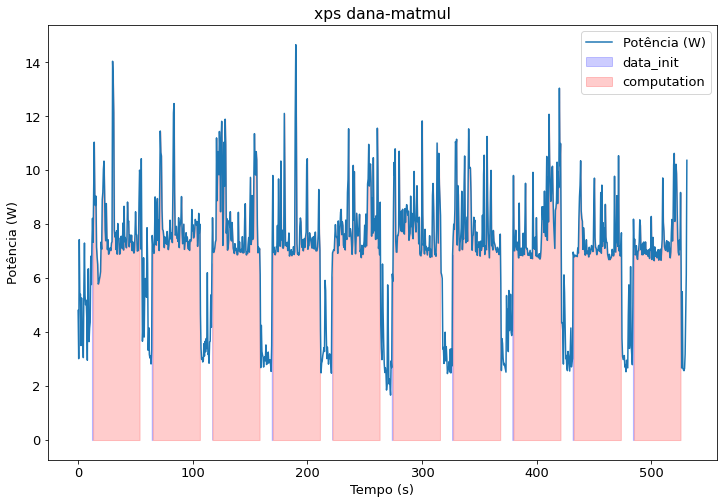

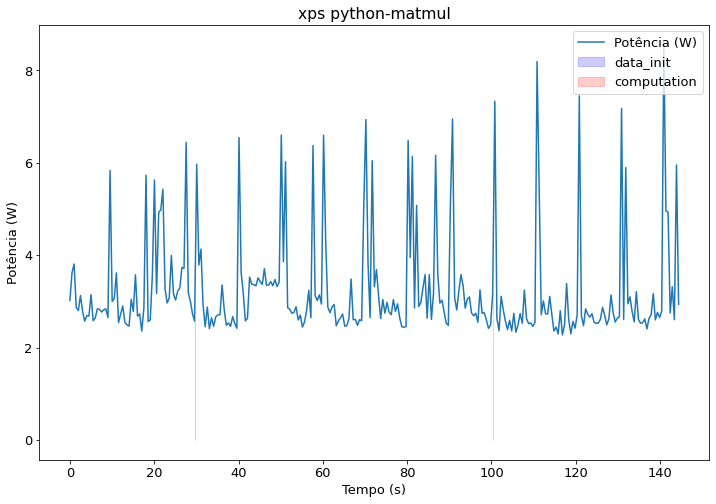

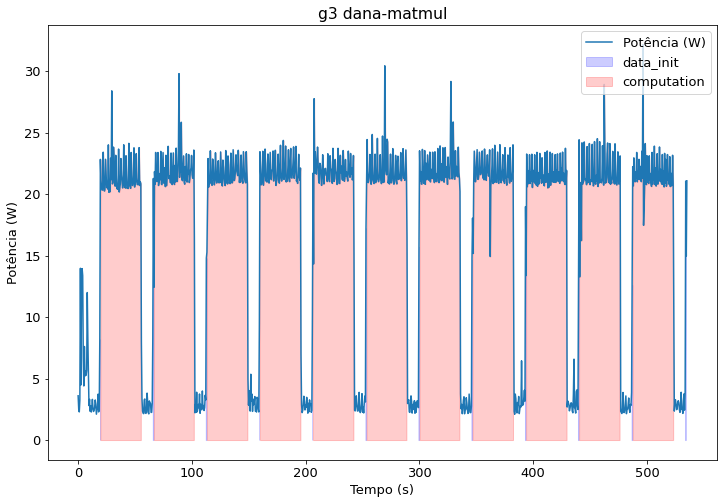

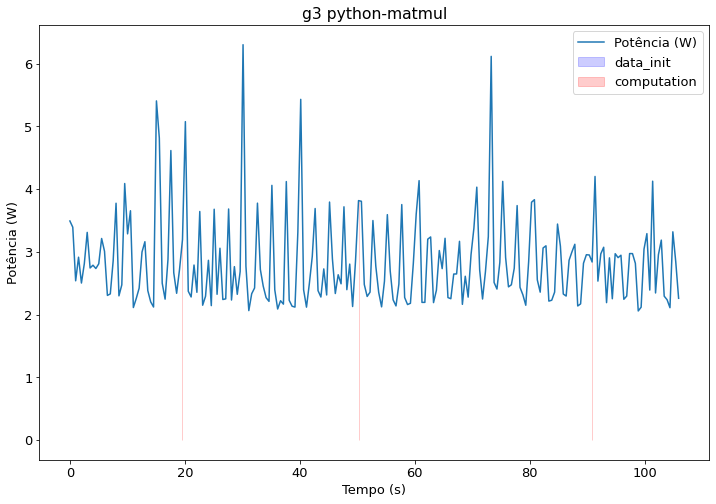

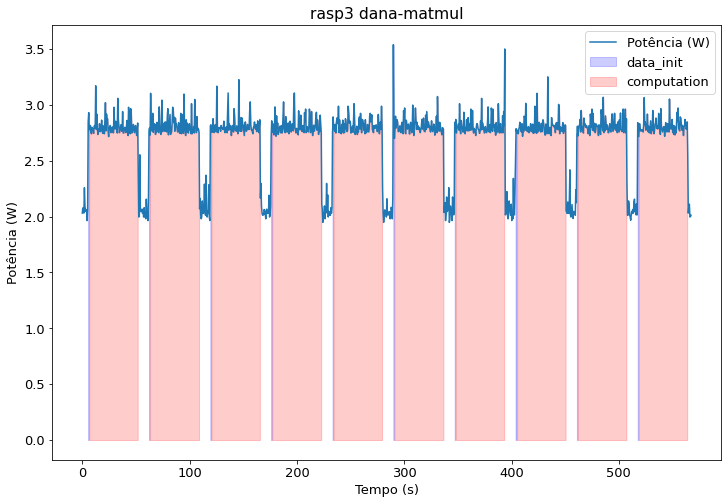

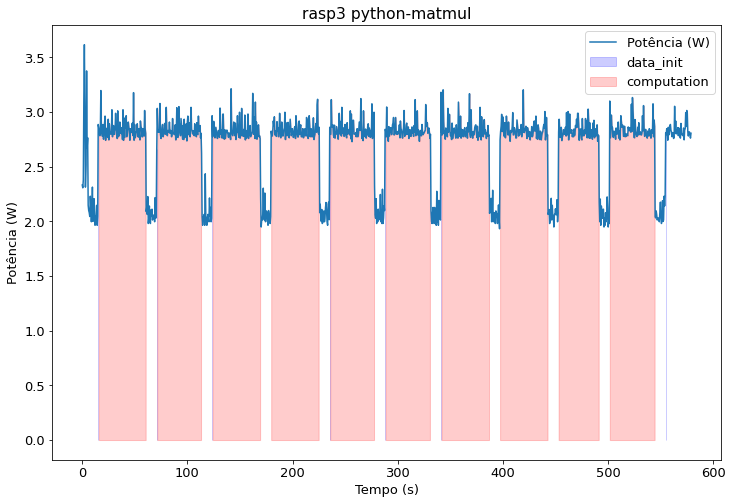

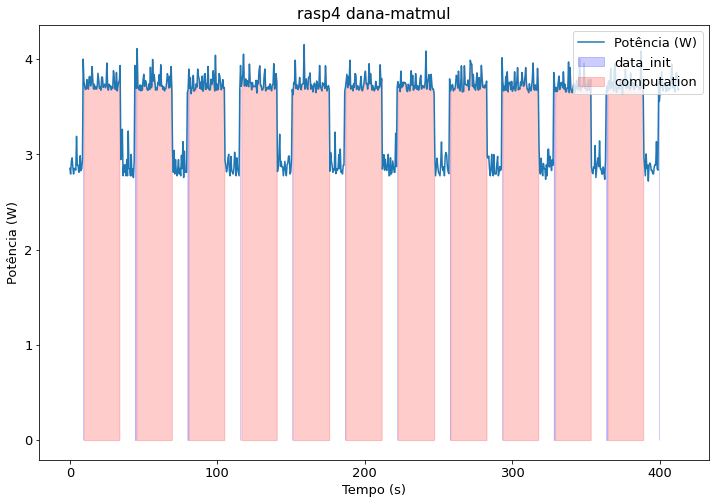

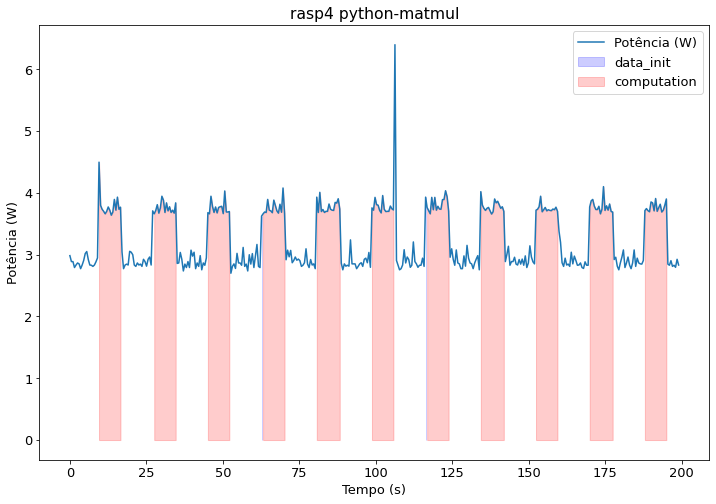

In [140]:
exps = [
#     "xps_dana-default",
    "xps_dana-matmul",
    "xps_python-matmul",
#     "xps_python-fft",
#     "g3_dana-default",
    "g3_dana-matmul",
    "g3_python-matmul",
#     "g3_python-fft",
#     "rasp3_dana-default",
    "rasp3_dana-matmul",
    "rasp3_python-matmul",
#     "rasp3_python-fft",
#     "rasp4_dana-default",
    "rasp4_dana-matmul",
    "rasp4_python-matmul",
#     "rasp4_python-fft",
]

for exp in exps:
    power = read_power_data(f"outputs/{exp}_power.csv")
    regions = read_regions_data(f"outputs/{exp}_regions.csv")
    title = f"{exp.split('_')[0]} {exp.split('_')[1]}" 
    power_graph(power, title, regions)

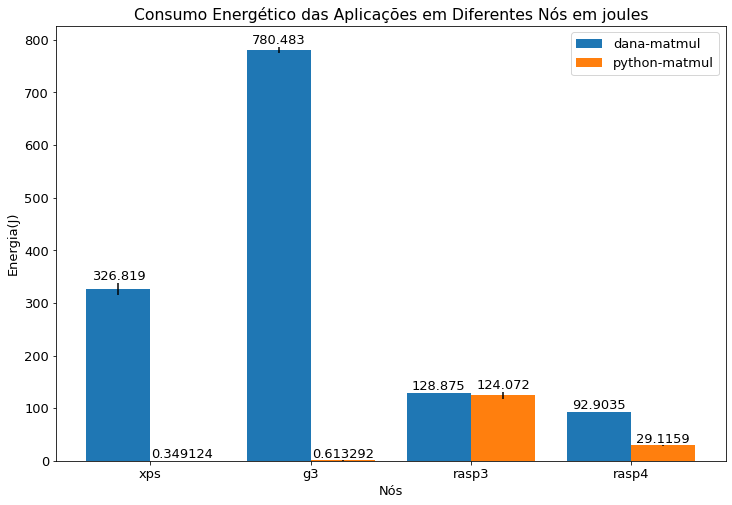

In [227]:
groups = ["xps", "g3", "rasp3", "rasp4"]
exps = ["dana-matmul", "python-matmul"]

results = []
err = []

for exp in exps:
    aux = []
    aux_err = []
    for group in groups:
        regions = read_regions_data(f"outputs/{group}_{exp}_regions.csv")
        mean, std = get_energy(regions)
        aux.append(mean)
        aux_err.append(std)
    results.append(aux)
    err.append(aux_err)

bar_graph(results, err, exps, groups, "Consumo Energético das Aplicações em Diferentes Nós em joules", "Energia(J)")

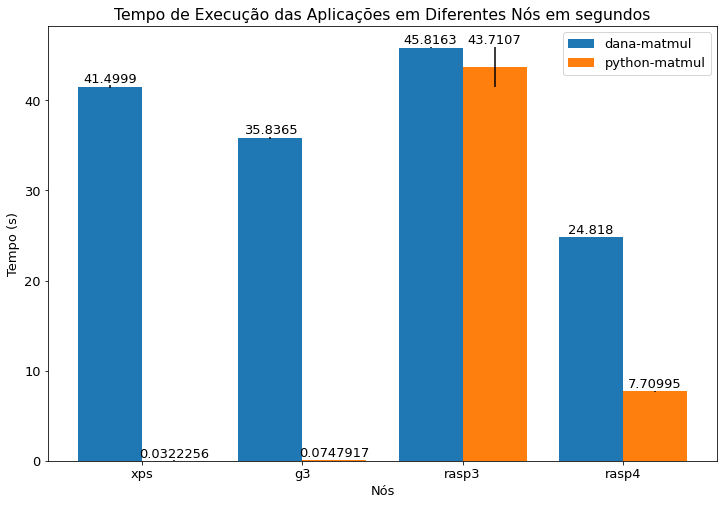

In [228]:
groups = ["xps", "g3", "rasp3", "rasp4"]
exps = ["dana-matmul", "python-matmul"]

results = []
err = []

for exp in exps:
    aux = []
    aux_err = []
    for group in groups:
        regions = read_regions_data(f"outputs/{group}_{exp}_regions.csv")
        mean, std = get_time(regions)
        aux.append(mean)
        aux_err.append(std)
    results.append(aux)
    err.append(aux_err)
bar_graph(results, err, exps, groups, "Tempo de Execução das Aplicações em Diferentes Nós em segundos", "Tempo (s)")

# Dana Web Server

In [234]:
def read_power_data_overflow(filename):
     with open(filename, "r") as f:
        headers = list(f.readline().strip().split(","))
        data = []
        f.readline()
        for line in f:
            values = list(map(float, line.split(",")))
            if values[-1] > 30 or values[-1] < 0:
                continue
            data.append(values)
        df = pd.DataFrame(data=data, columns=headers)
        return df

def power_graph_webserver(dataframe, title, regions):
    x_axis = dataframe['timestamp']-dataframe['timestamp'][0]
    plt.plot(x_axis, dataframe['power(W)'], label="Potência (W)")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Potência (W)")
    legend = {
        "add_item": "b",
        "get_items": "r",
        "remove_item": "y",
    }
    labels = []
    for index, region in regions.iterrows():
        if region['name'] in labels:
            plt.fill_between(
                    x=x_axis,
                    y1=dataframe['power(W)'], 
                    where= dataframe['timestamp'].between(region['start'], region['end']),
                    color= legend[region["name"]],
                    alpha=0.2)
        else:
            aux = plt.fill_between(
                    x=x_axis,
                    y1=dataframe['power(W)'], 
                    where= dataframe['timestamp'].between(region['start'], region['end']),
                    label=region["name"],
                    color=legend[region["name"]],
                    alpha=0.2)
            labels.append(region["name"])



    plt.title(title)
    plt.legend(loc=1)
    plt.show()
    
def bar_graph_webserver(values_set, errors_set, labels, group, title, ylabel):
    x_pos = np.arange(len(group))*2.5
    fig, ax = plt.subplots()
    for values, errors, label in zip(values_set, errors_set, labels):
        bars = ax.bar(x_pos, values, 0.5, yerr=errors, label=label)
        ax.bar_label(bars)
        x_pos += 0.5
    ax.set_xticks(np.arange(len(groups))*2.5 + (0.25*(len(values_set)-1)))
    ax.set_xticklabels(group)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Operação")
    ax.set_title(title)
    ax.legend()
    plt.show()



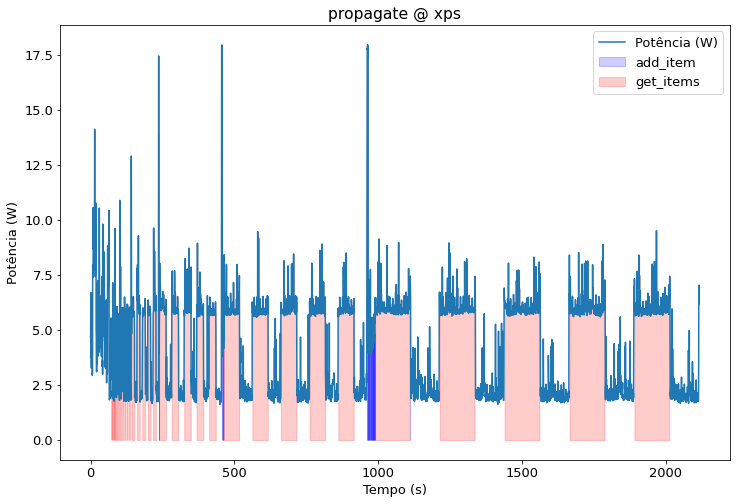

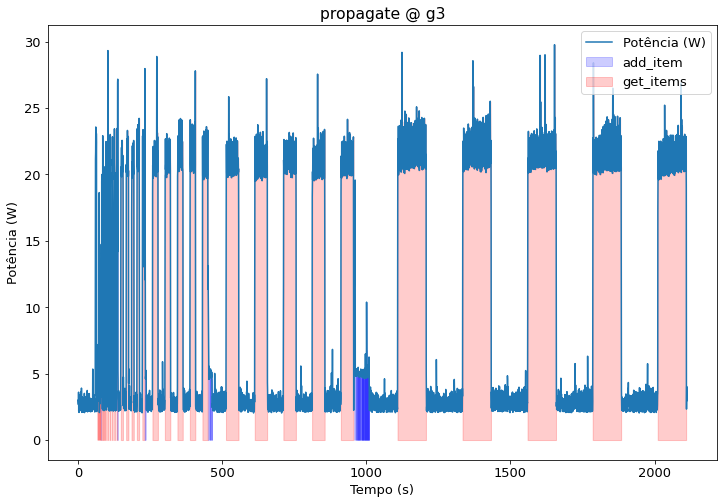

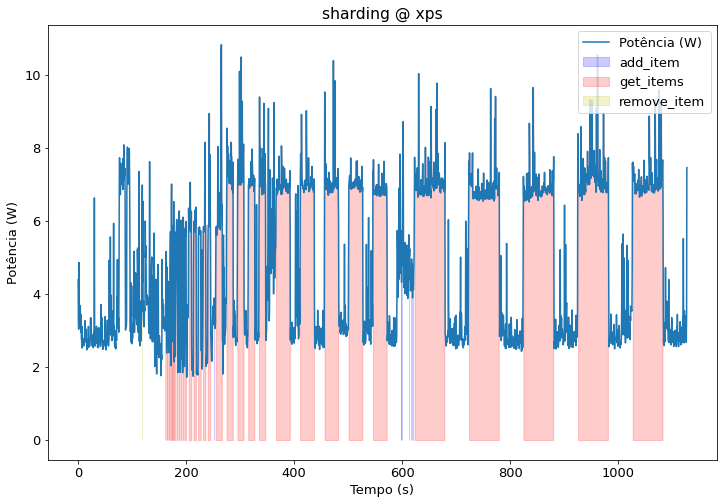

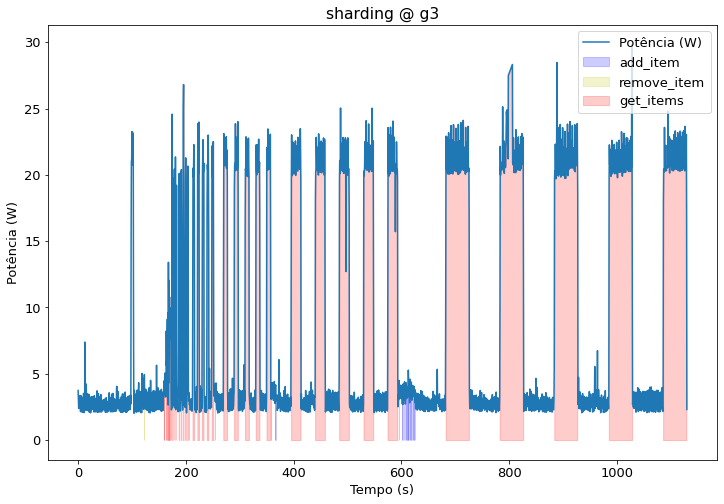

In [172]:
exps = [
    "propagate_1_xps",
    "propagate_2_g3",
    "sharding_1_xps",
    "sharding_2_g3"
]

for exp in exps:
    power = read_power_data_overflow(f"outputs_server/{exp}_power.csv")
    regions = read_regions_data(f"outputs_server/{exp}_regions.csv")
    title = f"{exp.split('_')[0]} @ {exp.split('_')[2]}" 
    power_graph_webserver(power, title, regions)

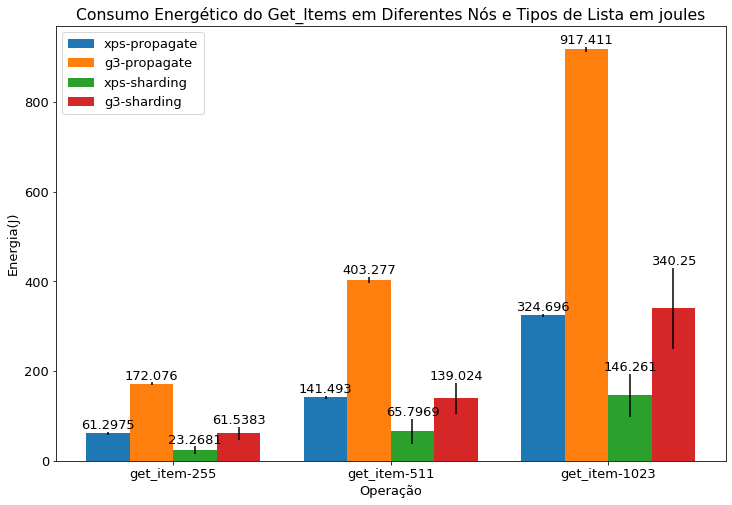

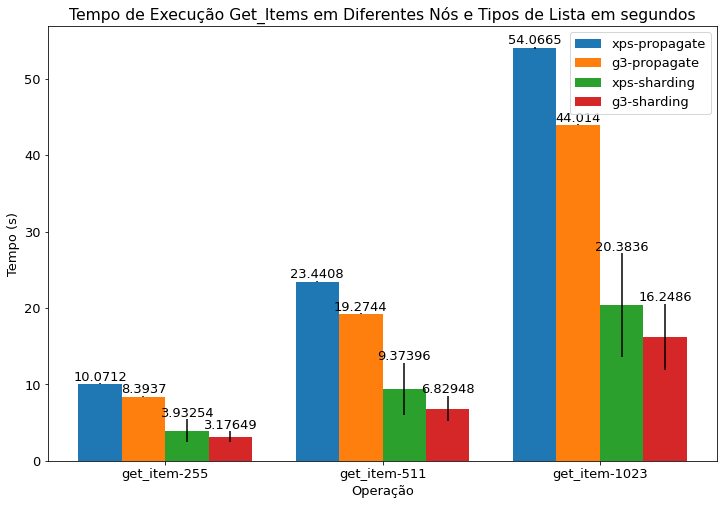

In [253]:
groups = ["get_item-255", "get_item-511",  "get_item-1023"]
exps = ["xps-propagate", "g3-propagate", "xps-sharding", "g3-sharding"]
files = ["propagate_1_xps", "propagate_2_g3", "sharding_1_xps", "sharding_2_g3"]
n_groups = len(exps)
times = []
times_err = []
energy = []
energy_err = []
for i in range(n_groups):
    times.append([])
    times_err.append([])
    energy.append([])
    energy_err.append([])

for i, f in enumerate(files):
    regions = read_regions_data(f"outputs_server/{f}_regions.csv")
    get = regions.loc[regions["name"] == "get_items"]
    get_times = get['end'] - get['start']
    get_energy = get["energy(J)"]
    for j in range(3):
        off = j+6
        times[i].append(np.mean(get_times[off*5:(off+1)*5]))
        times_err[i].append(np.std(get_times[off*5:(off+1)*5]))
        energy[i].append(np.mean(get_energy[off*5:(off+1)*5]))
        energy_err[i].append(np.std(get_energy[off*5:(off+1)*5]))
bar_graph_webserver(energy, energy_err, exps, groups, "Consumo Energético do Get_Items em Diferentes Nós e Tipos de Lista em joules", "Energia(J)")
bar_graph_webserver(times, times_err, exps, groups, "Tempo de Execução Get_Items em Diferentes Nós e Tipos de Lista em segundos", "Tempo (s)")

1009
1011
531
516


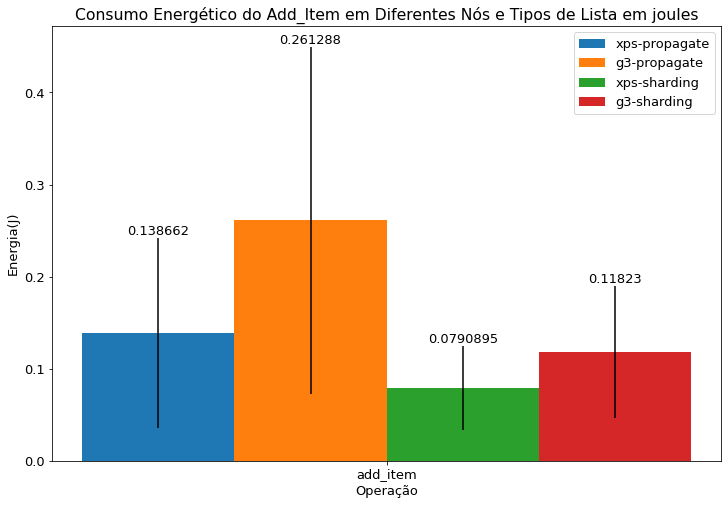

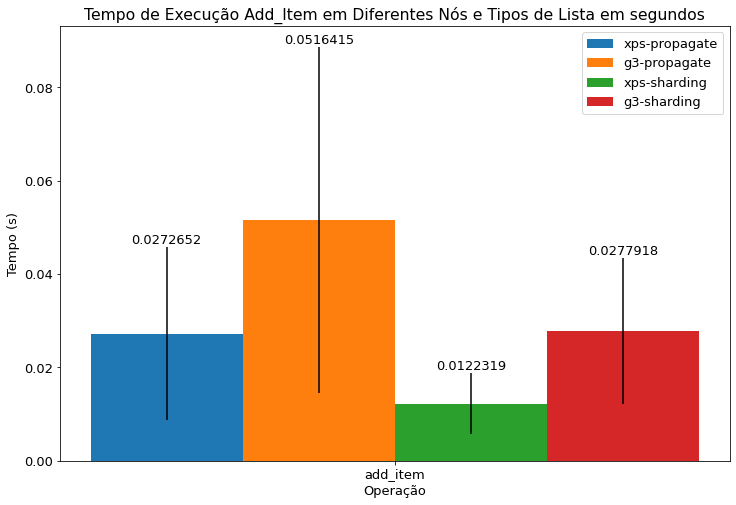

In [256]:
groups = ["add_item"]
exps = ["xps-propagate", "g3-propagate", "xps-sharding", "g3-sharding"]
files = ["propagate_1_xps", "propagate_2_g3", "sharding_1_xps", "sharding_2_g3"]
n_groups = len(exps)
times = []
times_err = []
energy = []
energy_err = []
for i in range(n_groups):
    times.append([])
    times_err.append([])
    energy.append([])
    energy_err.append([])

for i, f in enumerate(files):
    regions = read_regions_data(f"outputs_server/{f}_regions.csv")
    add = regions.loc[regions["name"] == "add_item"]
    add = add.loc[add["energy(J)"] < 1] #algumas coletas apresentaram valores absurdos (~100~1000J), aproximadamente 10 amostras assim
    add = add.loc[add["energy(J)"] > 0] # e um valor veio negativo
    print(len(add))
    times[i].append(np.mean(add['end'] - add['start']))
    times_err[i].append(np.std(add['end'] - add['start']))
    energy[i].append(np.mean(add["energy(J)"]))
    energy_err[i].append(np.std(add["energy(J)"]))
    get = regions.loc[regions["name"] == "get_items"]
    get_times = get['end'] - get['start']
    get_energy = get["energy(J)"]
    
bar_graph_webserver(energy, energy_err , exps, groups, "Consumo Energético do Add_Item em Diferentes Nós e Tipos de Lista em joules", "Energia(J)")
bar_graph_webserver(times, times_err, exps, groups, "Tempo de Execução Add_Item em Diferentes Nós e Tipos de Lista em segundos", "Tempo (s)")